In [1]:
%matplotlib inline

In [38]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import keras
from keras.layers.convolutional import ZeroPadding2D
batch_size = 128
nb_classes = 10
nb_epoch = 10

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()



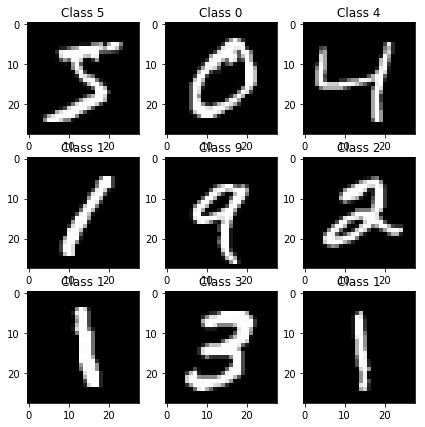

In [11]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [39]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)
print('Y_train shape:', Y_train.shape)

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)
Y_test shape: (10000, 10)
Y_train shape: (60000, 10)
60000 train samples
10000 test samples


In [40]:

model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])



In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_3 (ZeroPaddin (None, 30, 30, 1)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 10816)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                692288    
__________

## Train the model!
This is the fun part: you can feed the training data loaded in earlier into this model and it will learn to classify digits

In [42]:
model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(X_test, Y_test))


score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 471s - loss: 0.3393 - acc: 0.8968 - val_loss: 0.0622 - val_acc: 0.9798
Epoch 2/10
60000/60000 [==============================] - 465s - loss: 0.1327 - acc: 0.9613 - val_loss: 0.0509 - val_acc: 0.9828
Epoch 3/10
60000/60000 [==============================] - 480s - loss: 0.0983 - acc: 0.9699 - val_loss: 0.0408 - val_acc: 0.9866
Epoch 4/10
60000/60000 [==============================] - 475s - loss: 0.0804 - acc: 0.9755 - val_loss: 0.0360 - val_acc: 0.9875
Epoch 5/10
60000/60000 [==============================] - 462s - loss: 0.0735 - acc: 0.9788 - val_loss: 0.0371 - val_acc: 0.9876
Epoch 6/10
60000/60000 [==============================] - 457s - loss: 0.0621 - acc: 0.9807 - val_loss: 0.0309 - val_acc: 0.9894
Epoch 7/10
60000/60000 [==============================] - 460s - loss: 0.0586 - acc: 0.9816 - val_loss: 0.0322 - val_acc: 0.9905
Epoch 8/10
60000/60000 [=======================

### Inspecting the output

It's always a good idea to inspect the output and make sure everything looks sane. Here we'll look at some examples it gets right, and some examples it gets wrong.

In [12]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

10000/10000 [==============================] - 19s     

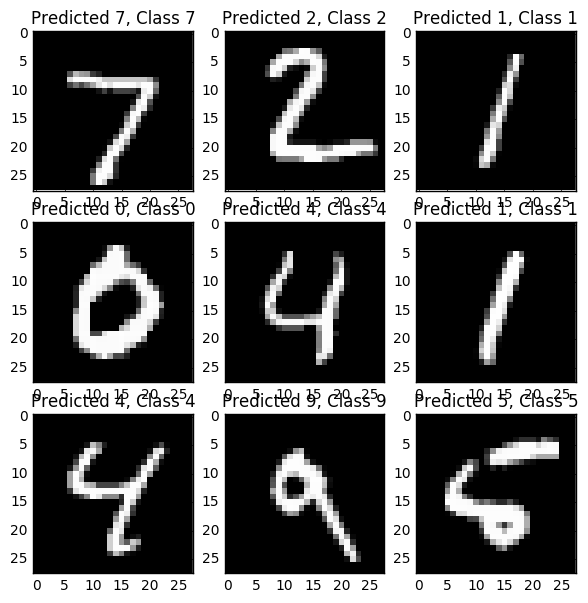

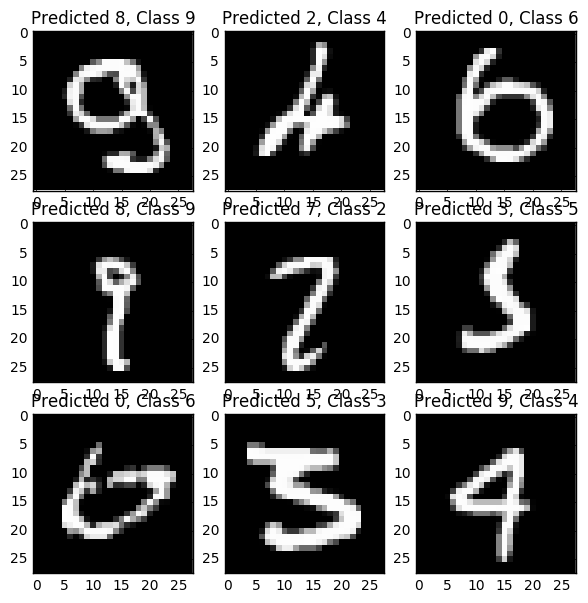

In [13]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))